In [ ]:
# import required libraries or commands within a library
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
#from sklearn.metrics import mean_absolute_percentage_error as MAPE
import statsmodels.api as sa
import statsmodels.formula.api as sfa
from statsmodels.tsa.api import ExponentialSmoothing as TES 
from statsmodels.tsa.api import SimpleExpSmoothing as SES
from statsmodels.tsa.api import Holt as DES

In [1]:
MNDI=yf.download('MNDI.L',start='2020-03-02',end='2022-03-01')
SMDS=yf.download('SMDS.L',start='2020-03-02',end='2022-03-01')
FTSE=yf.download('^FTSE',start='2020-03-02',end='2022-03-01')

NameError: name 'yf' is not defined

In [5]:
MNDI

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1589.0,1608.5,1529.86499,1572.0,1570.459839,3403123
2020-03-03,1598.0,1648.5,1588.00000,1611.0,1609.421631,2680751
2020-03-04,1620.0,1660.5,1613.50000,1659.5,1657.874023,2462905
2020-03-05,1678.5,1678.5,1620.50000,1628.0,1626.405029,3392459
2020-03-06,1588.0,1614.5,1575.50000,1591.0,1589.441284,3805706
...,...,...,...,...,...,...
2022-02-22,1858.0,1920.0,1852.00000,1898.5,1898.500000,1912962
2022-02-23,1911.5,1935.5,1900.50000,1908.5,1908.500000,1172399
2022-02-24,1805.5,1844.5,1684.00000,1684.0,1684.000000,3356030


In [6]:
SMDS

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,315.299988,324.826996,308.399994,316.299988,316.146088,10737333
2020-03-03,320.399994,335.799988,319.100006,322.500000,322.343079,8215940
2020-03-04,327.100006,337.649994,324.000000,325.899994,325.741394,7197511
2020-03-05,325.700012,331.600006,319.899994,328.100006,327.940338,7775642
2020-03-06,320.000000,326.000000,313.100006,322.100006,321.943268,5706080
...,...,...,...,...,...,...
2022-02-22,354.600006,365.399994,351.148010,361.100006,361.100006,1964922
2022-02-23,362.299988,367.500000,357.799988,357.799988,357.799988,2312517
2022-02-24,343.200012,352.799988,331.600006,331.600006,331.600006,7287027


In [7]:
FTSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,6580.600098,6775.200195,6496.000000,6654.899902,6654.899902,1770844200
2020-03-03,6654.899902,6846.299805,6654.899902,6718.200195,6718.200195,1277190200
2020-03-04,6718.200195,6856.299805,6700.200195,6815.600098,6815.600098,1115783100
2020-03-05,6815.600098,6834.100098,6662.600098,6705.399902,6705.399902,1146893100
2020-03-06,6705.399902,6705.399902,6431.399902,6462.600098,6462.600098,1377953500
...,...,...,...,...,...,...
2022-02-22,7484.299805,7531.299805,7365.000000,7494.200195,7494.200195,1018787100
2022-02-23,7494.200195,7550.000000,7490.500000,7498.200195,7498.200195,862648700
2022-02-24,7498.200195,7498.200195,7204.700195,7207.000000,7207.000000,1966584700


In [8]:
MNDI.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [9]:
MNDI.index.difference(SMDS.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
MNDI.index.difference(FTSE.index) 

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [11]:
SMDS.index.difference(FTSE.index) 

DatetimeIndex(['2020-12-22'], dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
FTSE.index.difference(MNDI.index)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
MNDI=MNDI.drop(['2020-12-22'])
SMDS=SMDS.drop(['2020-12-22'])

In [14]:
MNDI

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1589.0,1608.5,1529.86499,1572.0,1570.459839,3403123
2020-03-03,1598.0,1648.5,1588.00000,1611.0,1609.421631,2680751
2020-03-04,1620.0,1660.5,1613.50000,1659.5,1657.874023,2462905
2020-03-05,1678.5,1678.5,1620.50000,1628.0,1626.405029,3392459
2020-03-06,1588.0,1614.5,1575.50000,1591.0,1589.441284,3805706
...,...,...,...,...,...,...
2022-02-22,1858.0,1920.0,1852.00000,1898.5,1898.500000,1912962
2022-02-23,1911.5,1935.5,1900.50000,1908.5,1908.500000,1172399
2022-02-24,1805.5,1844.5,1684.00000,1684.0,1684.000000,3356030


In [15]:
MNDI=MNDI.drop(columns=['Open','High','Low','Close','Volume'])
SMDS=SMDS.drop(columns=['Open','High','Low','Close','Volume'])
FTSE=FTSE.drop(columns=['Open','High','Low','Close','Volume'])

In [16]:
# Training sets
MNDItr=MNDI.iloc[0:484]
SMDStr=SMDS.iloc[0:484]
FTSEtr=FTSE.iloc[0:484]

In [17]:
# Test set
MNDIte=MNDI.iloc[484:504]
SMDSte=SMDS.iloc[484:504]
FTSEte=FTSE.iloc[484:504]

In [2]:
returns1=(MNDItr['Adj Close']-MNDItr.shift(1)['Adj Close'])/MNDItr.shift(1)['Adj Close']
returns2=(SMDStr['Adj Close']-SMDStr.shift(1)['Adj Close'])/SMDStr.shift(1)['Adj Close']
returns3=(FTSEtr['Adj Close']-FTSEtr.shift(1)['Adj Close'])/FTSEtr.shift(1)['Adj Close']

NameError: name 'MNDItr' is not defined

In [1]:
MNDItr['Return']=returns1
SMDStr['Return']=returns2
FTSEtr['Return']=returns3

NameError: name 'returns1' is not defined

In [20]:
MNDIte['Return']=(MNDIte['Adj Close']-MNDIte.shift(1)['Adj Close'])/MNDIte.shift(1)['Adj Close']
MNDIte.iloc[0,1]=(MNDIte.iloc[0,0]-MNDItr.iloc[-1,0])/MNDItr.iloc[-1,0]
SMDSte['Return']=(SMDSte['Adj Close']-SMDSte.shift(1)['Adj Close'])/SMDSte.shift(1)['Adj Close']
SMDSte.iloc[0,1]=(SMDSte.iloc[0,0]-SMDStr.iloc[-1,0])/SMDStr.iloc[-1,0]
FTSEte['Return']=(FTSEte['Adj Close']-FTSEte.shift(1)['Adj Close'])/FTSEte.shift(1)['Adj Close']
FTSEte.iloc[0,1]=(FTSEte.iloc[0,0]-FTSEtr.iloc[-1,0])/FTSEtr.iloc[-1,0]

/var/folders/qn/3vnn7wbx7yj1crlz42k2n1vm0000gn/T/ipykernel_840/1198330448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MNDIte['Return']=(MNDIte['Adj Close']-MNDIte.shift(1)['Adj Close'])/MNDIte.shift(1)['Adj Close']
/Users/milo/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/qn/3vnn7wbx7yj1crlz42k2n1vm0000gn/T/ipykernel_840/1198330448.py:3: SettingWithCopyWarning: 
A value is try

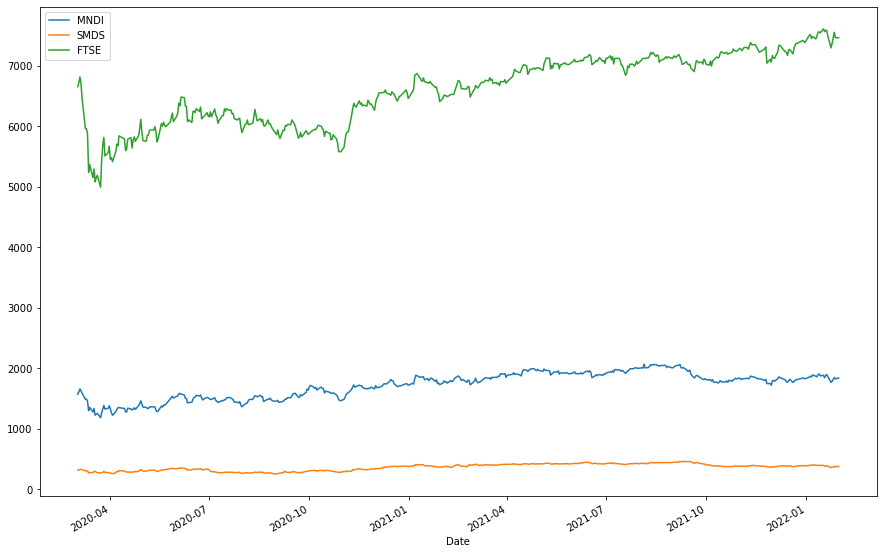

In [21]:
MNDItr['Adj Close'].plot(figsize=(15,10), label='MNDI')
SMDStr['Adj Close'].plot(label='SMDS')
FTSEtr['Adj Close'].plot(label='FTSE')
plt.legend()
plt.show()

In [22]:
#define a modified FTSE
mFTSEtr=pd.DataFrame()
mFTSEtr['m Adj Close']=FTSEtr['Adj Close']/10
#chia FTSE cho 10 để line gần lại nhau dễ phân tích hơn

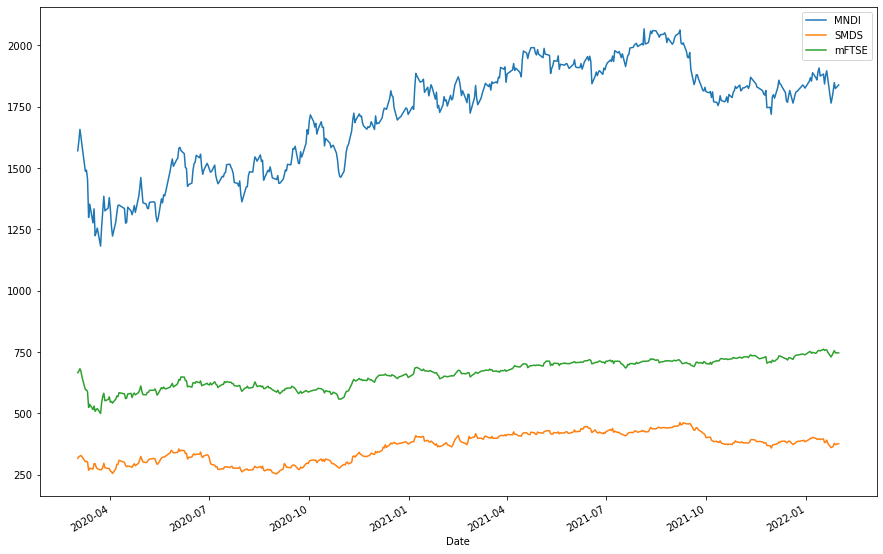

In [23]:
MNDItr['Adj Close'].plot(figsize=(15,10), label='MNDI')
SMDStr['Adj Close'].plot(label='SMDS')
mFTSEtr['m Adj Close'].plot(label='mFTSE')
plt.legend()
plt.show()

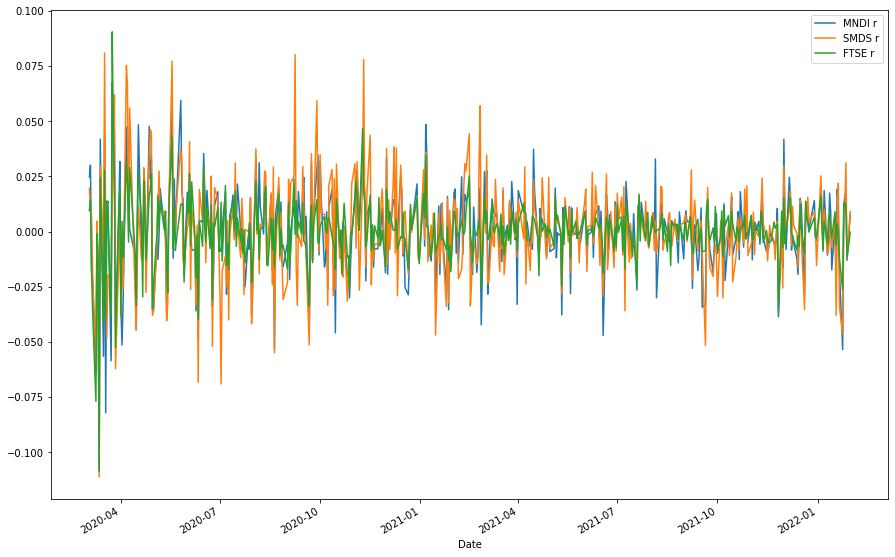

In [24]:
MNDItr['Return'].plot(figsize=(15,10), label='MNDI r')
SMDStr['Return'].plot(label='SMDS r')
FTSEtr['Return'].plot(label='FTSE r')
plt.legend()
plt.show()

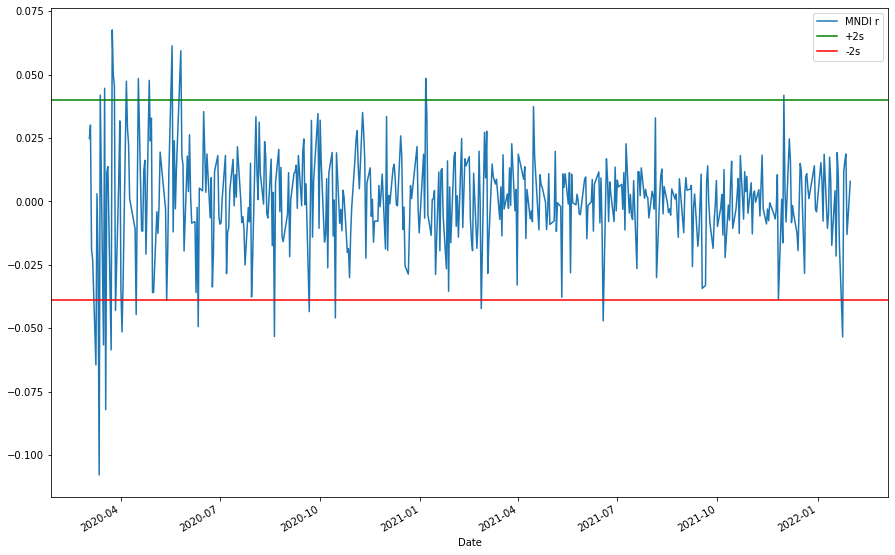

In [25]:
MNDItr['Return'].plot(figsize=(15,10), label='MNDI r')
plt.axhline(y=MNDItr['Return'].mean()+2*MNDItr['Return'].std(),label='+2s',color='g')
plt.axhline(y=MNDItr['Return'].mean()-2*MNDItr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()
#vd của thầy 2 đường có khoảng cách rộng hơn

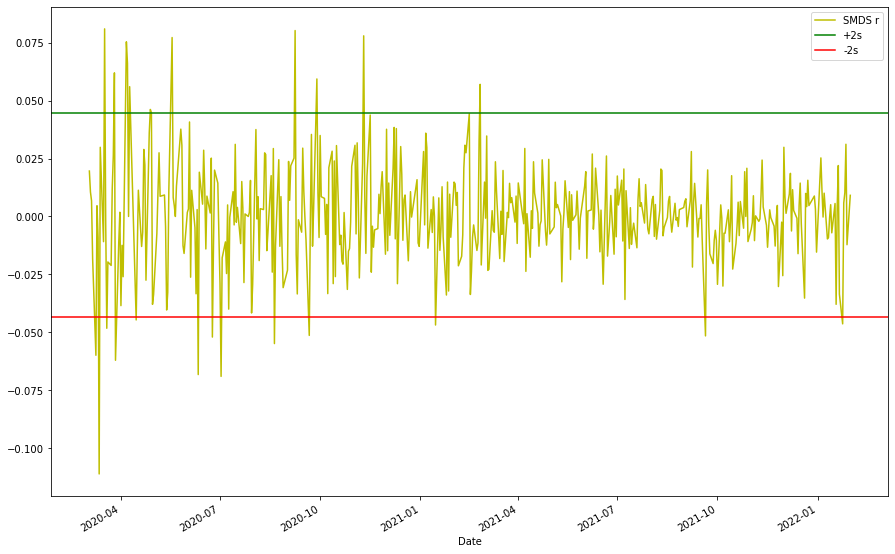

In [26]:
SMDStr['Return'].plot(figsize=(15,10), label='SMDS r', color='y')
plt.axhline(y=SMDStr['Return'].mean()+2*SMDStr['Return'].std(),label='+2s',color='g')
plt.axhline(y=SMDStr['Return'].mean()-2*SMDStr['Return'].std(),label='-2s',color='r')
plt.legend()
plt.show()
#Được sử dụng trong thống kê, các tiểu bang quy định rằng đối với một phân phối chuẩn hầu hết các giá trị này sẽ 
#được trong vòng 3 độ lệch chuẩn của giá trị trung bình. Còn được gọi là 68-95-99.7 quy tắc hoặc ba nguyên tắc 
#sigma.

In [27]:
pss=MNDItr['Return'].mean()+2*MNDItr['Return'].std()
MNDItr.loc[MNDItr['Return']>=pss]
#12

,Adj Close,Return
Date,,
2020-03-13,1353.172974,0.041923
2020-03-17,1333.691895,0.044601
2020-03-24,1261.762573,0.067625
2020-03-25,1324.700928,0.049881
2020-03-26,1385.141602,0.045626
2020-04-06,1280.780151,0.047405
2020-04-17,1340.746338,0.048456
2020-04-27,1382.223022,0.047727
2020-05-18,1374.727295,0.061343


In [28]:
nss=MNDItr['Return'].mean()-2*MNDItr['Return'].std()
MNDItr.loc[MNDItr['Return']<=nss]
#16

,Adj Close,Return
Date,,
2020-03-09,1487.041626,-0.064425
2020-03-12,1298.726196,-0.107756
2020-03-16,1276.747803,-0.056478
2020-03-18,1224.299194,-0.082022
2020-03-23,1181.840820,-0.058496
2020-03-27,1325.699951,-0.042914
2020-04-02,1262.790161,-0.051386
2020-04-15,1275.283081,-0.044553
2020-05-13,1305.765991,-0.038985


In [29]:
aaa=SMDStr['Return'].mean()+2*SMDStr['Return'].std()
SMDStr.loc[SMDStr['Return']>=aaa]
#11

,Adj Close,Return
Date,,
2020-03-17,294.856445,0.080982
2020-03-26,296.255768,0.061985
2020-04-06,273.766724,0.075383
2020-04-07,291.857941,0.066083
2020-04-09,308.206970,0.056017
2020-04-28,310.206360,0.046190
2020-04-29,324.102203,0.044795
2020-05-18,317.904053,0.077236
2020-09-08,294.711060,0.080249


In [30]:
bbb=SMDStr['Return'].mean()-2*SMDStr['Return'].std()
SMDStr.loc[SMDStr['Return']<=bbb]
#13

,Adj Close,Return
Date,,
2020-03-09,302.652618,-0.059919
2020-03-12,267.769653,-0.111148
2020-03-19,279.863739,-0.048267
2020-03-27,277.864746,-0.062078
2020-04-15,286.513519,-0.044667
2020-06-11,313.905273,-0.068249
2020-06-24,324.002197,-0.052062
2020-07-02,296.610504,-0.069030
2020-08-20,268.618927,-0.054872


In [31]:
MNDItr.loc[MNDItr['Return']==MNDItr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-12,1298.726196,-0.107756


In [32]:
SMDStr.loc[SMDStr['Return']==SMDStr['Return'].min()]

,Adj Close,Return
Date,,
2020-03-12,267.769653,-0.111148


#### SMDStr.loc[SMDStr['Return']==SMDStr['Return'].min()]

In [33]:
MNDItr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,1719.121327,0.000521
std,213.669588,0.019646
min,1181.840820,-0.107756
25%,1523.630341,-0.008574
50%,1784.760315,0.001112
75%,1882.631805,0.011611
max,2067.826904,0.067625


In [34]:
SMDStr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,361.600884,0.000602
std,57.273061,0.022056
min,252.623764,-0.111148
25%,305.057945,-0.011292
50%,377.735992,0.000233
75%,412.485245,0.011153
max,462.204071,0.080982


In [35]:
FTSEtr.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,6605.004545,0.000340
std,572.234329,0.014275
min,4993.899902,-0.108738
25%,6104.700195,-0.004957
50%,6709.800049,0.000712
75%,7092.175171,0.006969
max,7611.200195,0.090530


In [36]:
MNDItr['Return'].mean()/MNDItr['Return'].std()

0.026523693686855525

In [37]:
SMDStr['Return'].mean()/SMDStr['Return'].std()

0.027288190645614347

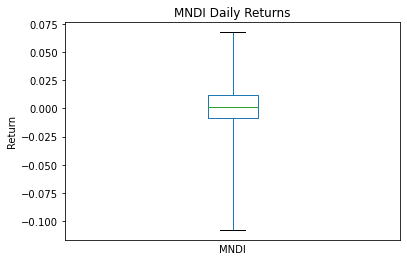

In [38]:
jdb=MNDItr.boxplot(column='Return',whis=[0,100],grid=False)

jdb.set_title("MNDI Daily Returns",fontsize=12)
jdb.set_xlabel('MNDI', fontsize=10)
jdb.set_ylabel('Return', fontsize=10)
jdb.set_xticks([])
plt.show()

In [39]:
AllTrainingReturns=pd.DataFrame({'MNDI r':MNDItr['Return'],'SMDS r':SMDStr['Return'],'FTSE r':FTSEtr['Return']})

In [40]:
AllTrainingReturns

,MNDI r,SMDS r,FTSE r
Date,,,
2020-03-02,NaN,NaN,NaN
2020-03-03,0.024809,0.019602,0.009512
2020-03-04,0.030105,0.010543,0.014498
2020-03-05,-0.018982,0.006751,-0.016169
2020-03-06,-0.022727,-0.018287,-0.036210
...,...,...,...
2022-01-25,0.011898,0.005833,0.010182
2022-01-26,0.015957,0.010218,0.013335
2022-01-27,0.018738,0.031165,0.011312


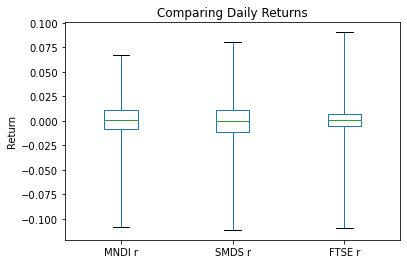

In [41]:
AllTrainingReturns.boxplot(whis=[0,100],grid=False)
plt.title('Comparing Daily Returns')
plt.ylabel('Return')
plt.show()
#show risk level

In [42]:
#median = 50%
#Q1 = 25%
#Q3 = 75%

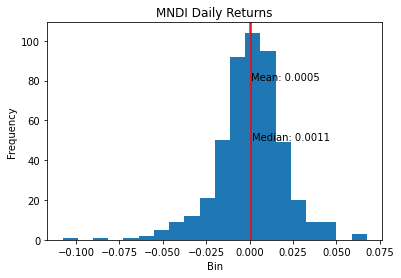

In [43]:
MNDItr.hist(column='Return',bins=20,grid=False)

plt.title("MNDI Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(MNDItr['Return'].mean())
plt.text(MNDItr['Return'].mean()*1.1,80,'Mean: {:,.4f}'.format(MNDItr['Return'].mean()))

plt.axvline(MNDItr['Return'].median(),color='r')
plt.text(MNDItr['Return'].median()*1.2,50,'Median: {:,.4f}'.format(MNDItr['Return'].median()))

plt.show()

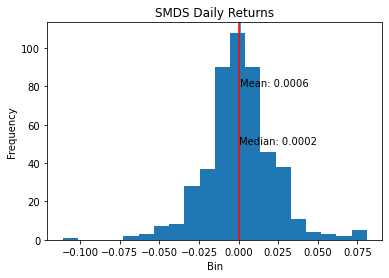

In [44]:
SMDStr.hist(column='Return',bins=20,grid=False)

plt.title("SMDS Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(SMDStr['Return'].mean())
plt.text(SMDStr['Return'].mean()*1.1,80,'Mean: {:,.4f}'.format(SMDStr['Return'].mean()))

plt.axvline(SMDStr['Return'].median(),color='r')
plt.text(SMDStr['Return'].median()*1.2,50,'Median: {:,.4f}'.format(SMDStr['Return'].median()))

plt.show()

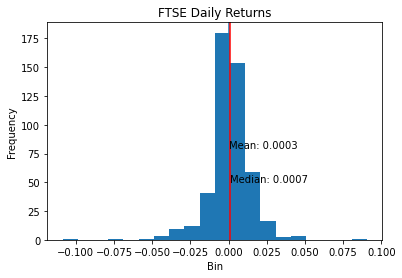

In [45]:
FTSEtr.hist(column='Return',bins=20,grid=False)

plt.title("FTSE Daily Returns",fontsize=12)
plt.xlabel('Bin', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.axvline(FTSEtr['Return'].mean())
plt.text(FTSEtr['Return'].mean()*1.1,80,'Mean: {:,.4f}'.format(FTSEtr['Return'].mean()))

plt.axvline(FTSEtr['Return'].median(),color='r')
plt.text(FTSEtr['Return'].median()*1.2,50,'Median: {:,.4f}'.format(FTSEtr['Return'].median()))

plt.show()

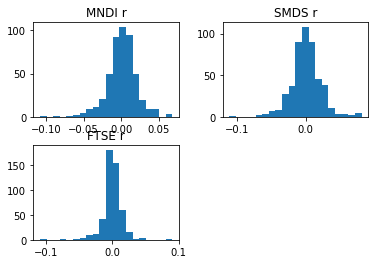

In [46]:
# it's better to draw histograms individually by the above codes

AllTrainingReturns.hist(bins=20,grid=False)
plt.show()
#negative return of JD from begining, so should consider the chart 2*std

In [47]:
# The three dataframes have the same column names, we should change the names and merge them together
MNDItr.columns=['MNDI_Price','MNDI_Return']
SMDStr.columns=['SMDS_Price','SMDS_Return']
FTSEtr.columns=['FTSE_Price','FTSE_Return']
#concatenate them by columns
OverallTraining=pd.concat([MNDItr,SMDStr,FTSEtr],axis=1)

In [48]:
OverallTraining.head()

,MNDI_Price,MNDI_Return,SMDS_Price,SMDS_Return,FTSE_Price,FTSE_Return
Date,,,,,,
2020-03-02,1570.459839,NaN,316.146088,NaN,6654.899902,NaN
2020-03-03,1609.421631,0.024809,322.343079,0.019602,6718.200195,0.009512
2020-03-04,1657.874023,0.030105,325.741394,0.010543,6815.600098,0.014498
2020-03-05,1626.405029,-0.018982,327.940338,0.006751,6705.399902,-0.016169
2020-03-06,1589.441284,-0.022727,321.943268,-0.018287,6462.600098,-0.036210


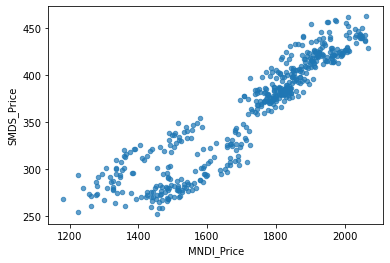

In [49]:
OverallTraining.plot.scatter(x='MNDI_Price',y='SMDS_Price',alpha=0.7)
plt.show()

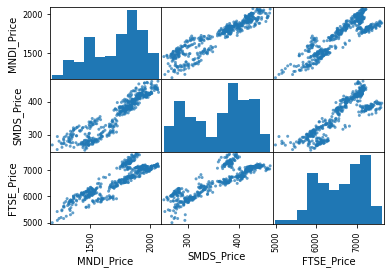

In [50]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[0,2,4]], alpha=0.7)
plt.show()

In [51]:
OverallTraining.iloc[:,[0,2,4]].corr(method='pearson')
#correlation fo find which one the strongest relation

,MNDI_Price,SMDS_Price,FTSE_Price
MNDI_Price,1.000000,0.927780,0.876418
SMDS_Price,0.927780,1.000000,0.849401
FTSE_Price,0.876418,0.849401,1.000000


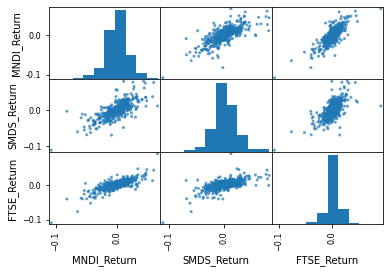

In [52]:
pd.plotting.scatter_matrix(OverallTraining.iloc[:,[1,3,5]], alpha=0.7)
plt.show()

In [53]:
OverallTraining.iloc[:,[1,3,5]].corr(method='pearson')

,MNDI_Return,SMDS_Return,FTSE_Return
MNDI_Return,1.000000,0.737471,0.790907
SMDS_Return,0.737471,1.000000,0.649276
FTSE_Return,0.790907,0.649276,1.000000


In [54]:
MNDI_SMDS_reg=sfa.ols('MNDI_Price ~ SMDS_Price', data=OverallTraining).fit()

In [55]:
MNDI_SMDS_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MNDI_Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2980.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.69e-208
Time:                        12:43:20   Log-Likelihood:                -2805.5
No. Observations:                 484   AIC:                             5615.
Df Residuals:                     482   BIC:                             5623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.5174     23.213     20.141      0.000     421.907     513.128
SMDS_Price     3.4613      0.063     54.590      0.000       3.337       3.586
==============================================================================
Omnibus:                       33.118   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.374
Skew:                          -0.687   Prob(JB):                     4.65e-09
Kurtosis:                       3.131   Cond. No.                     2.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

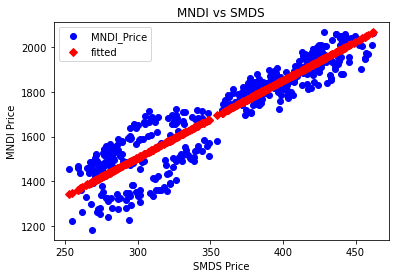

In [56]:
sa.graphics.plot_fit(MNDI_SMDS_reg,exog_idx='SMDS_Price',vlines=False)
plt.ylabel("MNDI Price")
plt.xlabel("SMDS Price")
plt.title("MNDI vs SMDS")
plt.show()

In [57]:
MNDI_FTSE_rreg=sfa.ols('MNDI_Return ~ FTSE_Return', data=OverallTraining).fit()

In [58]:
MNDI_FTSE_rreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MNDI_Return   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     803.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.17e-104
Time:                        12:43:20   Log-Likelihood:                 1450.5
No. Observations:                 483   AIC:                            -2897.
Df Residuals:                     481   BIC:                            -2889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0002      0.001      0.275      0.784      -0.001       0.001
FTSE_Return     1.0885      0.038     28.346      0.000       1.013       1.164
==============================================================================
Omnibus:                       31.051   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.638
Skew:                          -0.233   Prob(JB):                     3.43e-20
Kurtosis:                       5.058   Cond. No.                         70.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

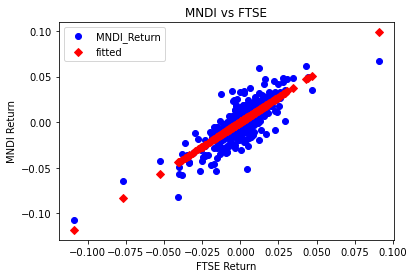

In [59]:
sa.graphics.plot_fit(MNDI_FTSE_rreg,exog_idx='FTSE_Return',vlines=False)
plt.ylabel("MNDI Return")
plt.xlabel("FTSE Return")
plt.title("MNDI vs FTSE")
plt.show()

In [60]:
# Multiple Regression
MNDI_SMDS_FTSE_reg=sfa.ols('MNDI_Price ~ SMDS_Price + FTSE_Price', data=OverallTraining).fit()

In [61]:
MNDI_SMDS_FTSE_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MNDI_Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1922.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.80e-230
Time:                        12:43:20   Log-Likelihood:                -2751.1
No. Observations:                 484   AIC:                             5508.
Df Residuals:                     481   BIC:                             5521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.6141     43.339      1.122      0.263     -36.544     133.772
SMDS_Price     2.4560      0.107     22.850      0.000       2.245       2.667
FTSE_Price     0.1185      0.011     11.012      0.000       0.097       0.140
==============================================================================
Omnibus:                        0.088   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.112
Skew:                          -0.032   Prob(JB):                        0.945
Kurtosis:                       2.963   Cond. No.                     8.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
MNDIte.columns=['MNDI_Price','MNDI_Return']
SMDSte.columns=['SMDS_Price','SMDS_Return']
FTSEte.columns=['FTSE_Price','FTSE_Return']

In [63]:
ma5=MNDItr.rolling(5).mean()

In [64]:
ma20=MNDItr.rolling(20).mean()

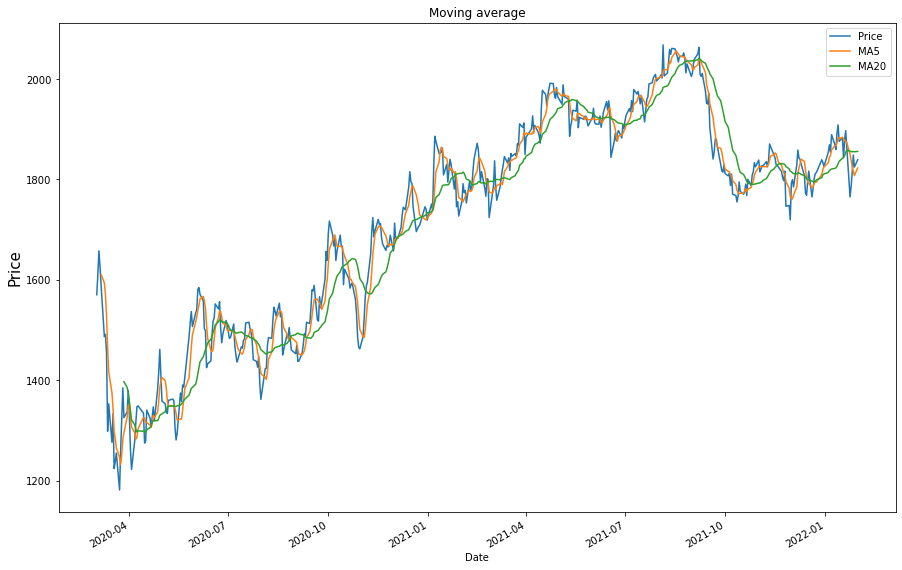

In [65]:
MNDItr['MNDI_Price'].plot(figsize=(15,10), title= 'Moving average', label='Price')
ma5['MNDI_Price'].plot(label='MA5')
ma20['MNDI_Price'].plot(label='MA20')
plt.legend()
plt.ylabel('Price',fontsize=15)
plt.show()

In [66]:
#creat forecasts
MNDIma5fcsts=pd.Series([ma5['MNDI_Price'][-1]]*20)
MNDIma5fcsts.index=MNDIte.index

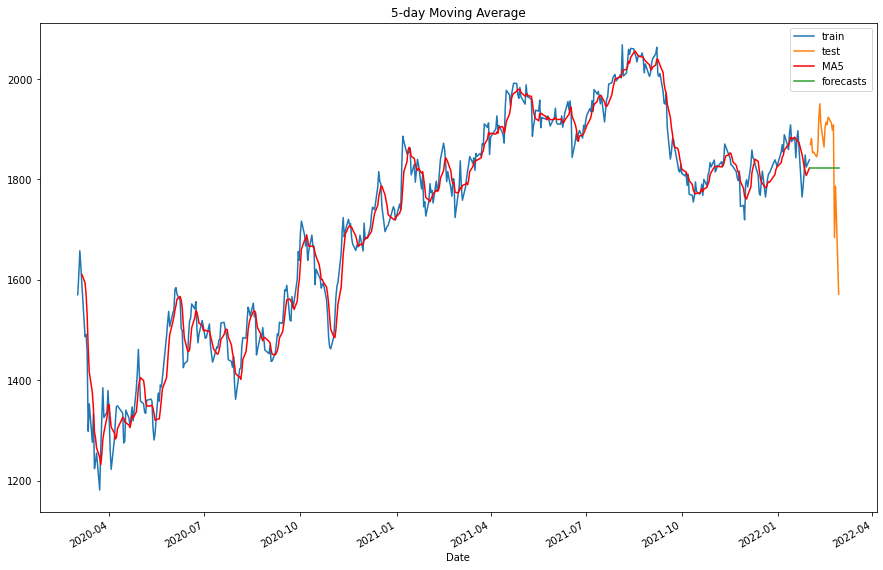

In [67]:
MNDItr['MNDI_Price'].plot(figsize=(15,10),label='train',title='5-day Moving Average')
MNDIte['MNDI_Price'].plot(label='test')
ma5['MNDI_Price'].plot(label='MA5', color='r')
MNDIma5fcsts.plot(label='forecasts')
plt.legend()
plt.show()

In [68]:
MAE(MNDIte['MNDI_Price'],MNDIma5fcsts)

80.95

In [69]:
MSE(MNDIte['MNDI_Price'],MNDIma5fcsts)

9114.4

In [70]:
print(
    'MAE: {:,.4f}'.format(MAE(MNDIte['MNDI_Price'],MNDIma5fcsts)),
    '\nMSE: {:,.4f}'.format(MSE(MNDIte['MNDI_Price'],MNDIma5fcsts))
                         )

MAE: 80.9500 
MSE: 9,114.4000


In [71]:
MNDIses=SES(MNDItr['MNDI_Price'],initialization_method="estimated").fit()

/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [72]:
MNDIsesfcsts=MNDIses.forecast(20)
MNDIsesfcsts.index=MNDIte.index

/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


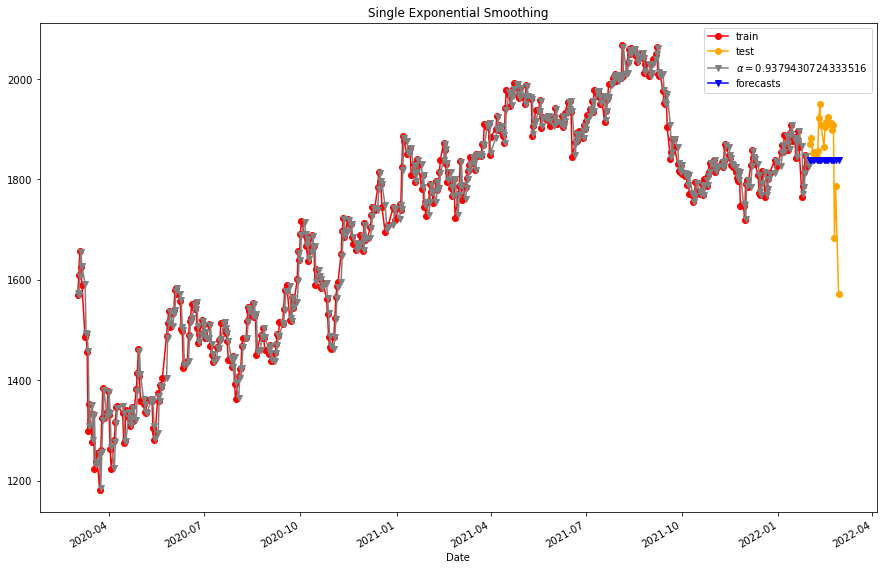

In [73]:
MNDItr['MNDI_Price'].plot(figsize=(15,10),marker='o',color='red',label='train',title='Single Exponential Smoothing')
MNDIte['MNDI_Price'].plot(marker='o',color='orange',label='test')
MNDIses.fittedvalues.plot(marker='v', color='grey',label=r'$\alpha=%s$'%MNDIses.model.params['smoothing_level'])
MNDIsesfcsts.plot(marker='v', color='blue',label='forecasts')
plt.legend()
plt.show()

In [74]:
print(
    'MAE: {:,.4f}'.format(MAE(MNDIte['MNDI_Price'],MNDIsesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(MNDIte['MNDI_Price'],MNDIsesfcsts))
)

MAE: 69.9712 
MSE: 8,155.8549


In [75]:
MNDIdes=DES(MNDItr['MNDI_Price'],initialization_method="estimated").fit()

/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [76]:
MNDIdesfcsts=MNDIdes.forecast(20)
MNDIdesfcsts.index=MNDIte.index

/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


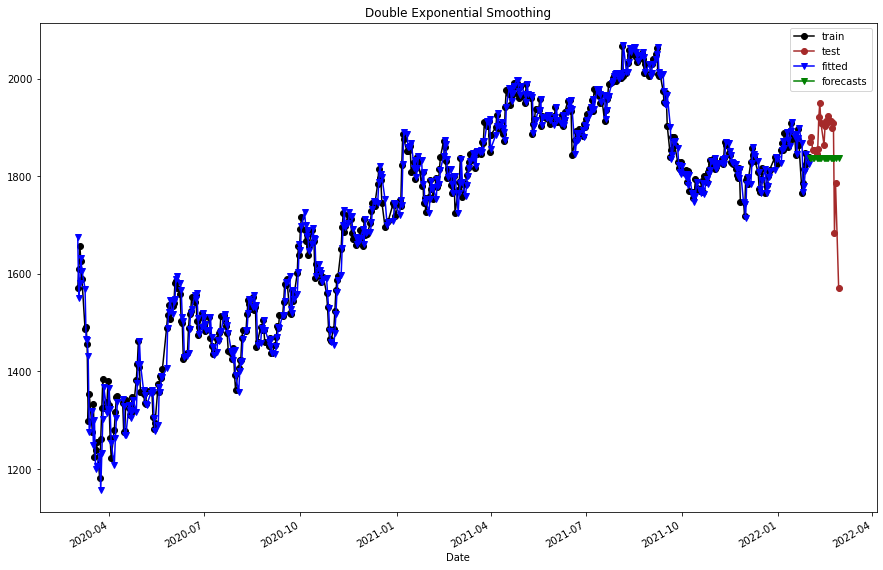

In [77]:
MNDItr['MNDI_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title='Double Exponential Smoothing')
MNDIte['MNDI_Price'].plot(marker='o',color='brown',label='test')
MNDIdes.fittedvalues.plot(marker='v', color='blue',label='fitted')
MNDIdesfcsts.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [78]:
print(
    'MAE: {:,.4f}'.format(MAE(MNDIte['MNDI_Price'],MNDIdesfcsts)),
    '\nMSE: {:,.4f}'.format(MSE(MNDIte['MNDI_Price'],MNDIdesfcsts))
)

MAE: 70.3151 
MSE: 8,168.5067


In [79]:
MNDItesa=TES(MNDItr['MNDI_Price'],seasonal_periods=4, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
MNDItesfcstsa=MNDItesa.forecast(20)
MNDItesfcstsa.index=MNDIte.index

/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


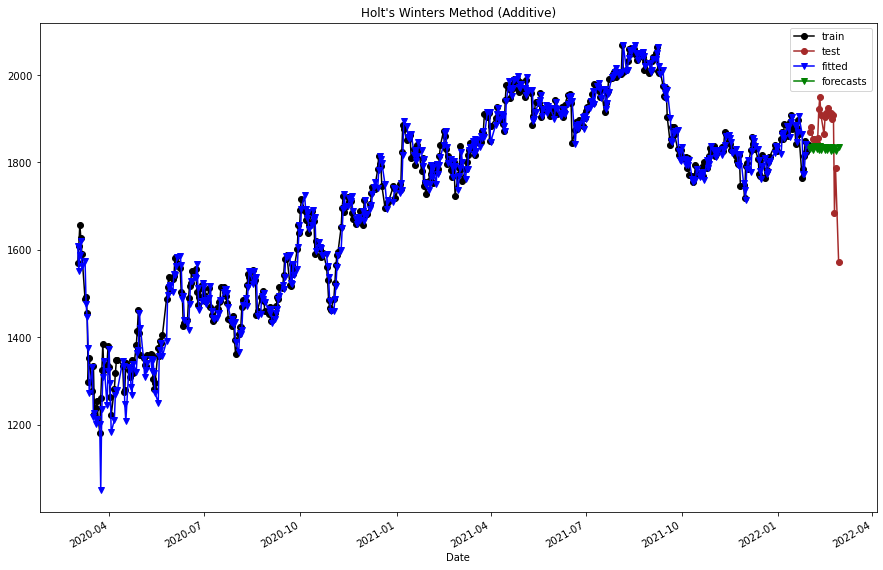

In [80]:
MNDItr['MNDI_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Additive)")
MNDIte['MNDI_Price'].plot(marker='o',color='brown',label='test')
MNDItesa.fittedvalues.plot(marker='v', color='blue',label='fitted')
MNDItesfcstsa.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [81]:
print(
    'MAE: {:,.4f}'.format(MAE(MNDIte['MNDI_Price'],MNDItesfcstsa)),
    '\nMSE: {:,.4f}'.format(MSE(MNDIte['MNDI_Price'],MNDItesfcstsa))
)
#Holt winter is the best one, focus on forecast

MAE: 74.0846 
MSE: 8,561.1235


In [82]:
MNDItesm=TES(MNDItr['MNDI_Price'],seasonal_periods=4, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
MNDItesfcstsm=MNDItesm.forecast(20)
MNDItesfcstsm.index=MNDIte.index

/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/milo/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


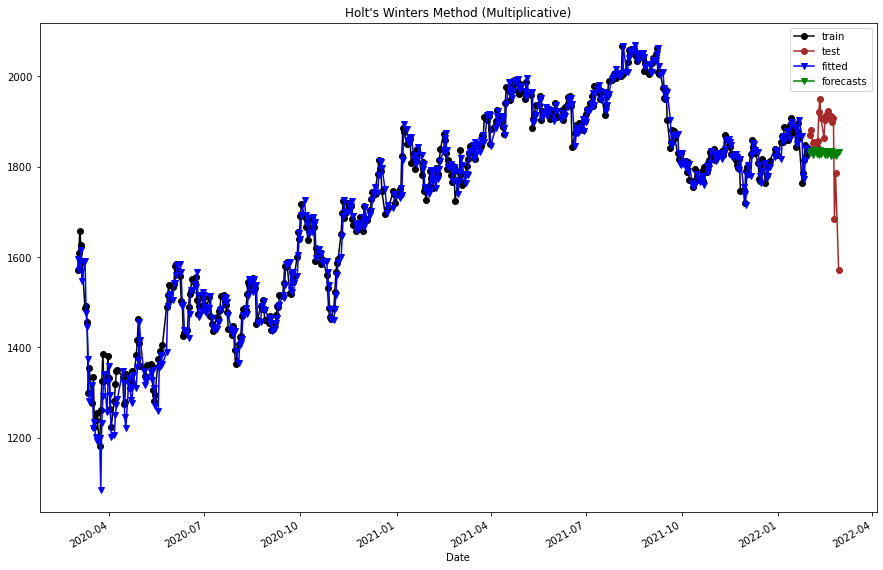

In [83]:
MNDItr['MNDI_Price'].plot(figsize=(15,10),marker='o',color='black',label='train',title="Holt's Winters Method (Multiplicative)")
MNDIte['MNDI_Price'].plot(marker='o',color='brown',label='test')
MNDItesm.fittedvalues.plot(marker='v', color='blue',label='fitted')
MNDItesfcstsm.plot(marker='v', color='green',label='forecasts')
plt.legend()
plt.show()

In [84]:
print(
    'MAE: {:,.4f}'.format(MAE(MNDIte['MNDI_Price'],MNDItesfcstsm)),
    '\nMSE: {:,.4f}'.format(MSE(MNDIte['MNDI_Price'],MNDItesfcstsm))
)

MAE: 75.3467 
MSE: 8,672.4928
